## Milestone 1: Project Proposal and Data Selection/Preparation.

This notebook refers to the first week of the final project of the Learn SQL Basics for Data Science Specialization.

### Project guideline - week 01.

You are a data scientist working for a data analytics company. Your company has explored a multitude of data sources and is tasked with providing key insights that your customers can make actionable. Your manager has asked you to provide some data analysis guidance for one of the company's customers.

In a typical scenario, you would iteratively work with your client to understand the data wanting to be analyzed.  Having a solid understanding of the data and any underlying assumptions present is crucial to the success of a data analysis project.  However, in this case, you will need to do a little more of the “heavy lifting”.

## Project Proposal.

For this project, I want to understand how female inclusion has evolved over the years. Identify the difference in performance between athletes, and which countries have the best performance.

### Questions:

Q1: What is the disparity between the sexes during the games;

Q2: Which countries have more representation, and how was the evolution of this representation;

Q3: Which countries have the best performance in the games.

## 01. Which client/dataset did you select and why?

I selected the Client 3: SportsStats (Olympics Dataset - 120 years of data)

SportsStats is a sports analysis firm partnering with local news and elite personal trainers to provide “interesting” insights to help their partners.  Insights could be patterns/trends highlighting certain groups/events/countries, etc. for the purpose of developing a news story or discovering key health insights.

I chose this dataset due to the smaller file size compared to the other options.

## 02. Describe the steps you took to import and clean the data.

As the data is available in a CSV file, I imported it into a Notebook to perform my first analyzes using Python.
To perform the cleanup I removed duplicate values, to understand the number of athletes involved in the games, and also some of the empty values.

Of the 271,116 data points, 9,474 have no age value, 60,171 have no height value, 62,875 have no weight value. The values for Gender, Games and their attributes (year, city, etc.) are complete. As team names can change, using NOC would be more efficient.



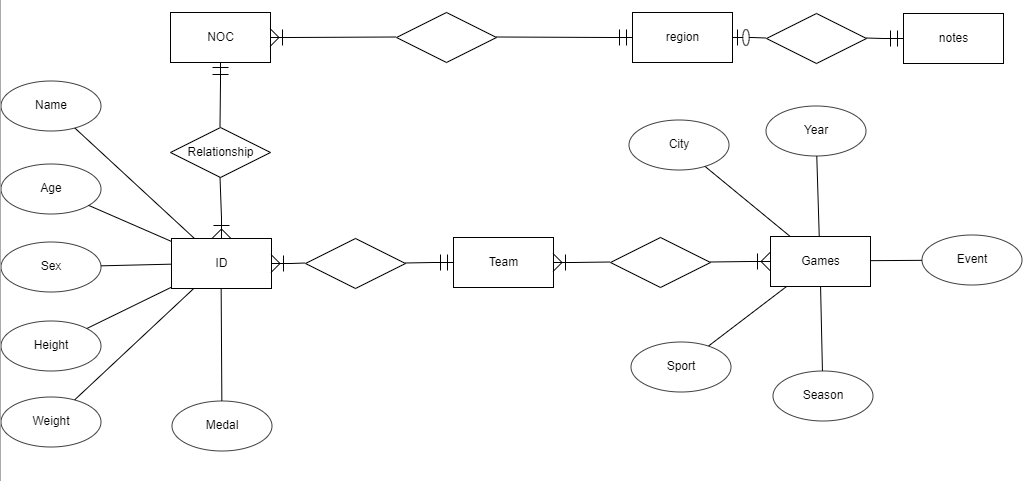

## 03. Initial EDA.

In [3]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [4]:
# Files have been uploaded to my Google Drive.
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
athelete_events_df = pd.read_csv("/content/drive/MyDrive/Data/athlete_events.csv")
noc_regions_df = pd.read_csv("/content/drive/MyDrive/Data/noc_regions.csv")

In [6]:
athelete_events_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [7]:
noc_regions_df

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [23]:
# I want to know how many athletes we have of each gender.
grouped = athelete_events_df.groupby(athelete_events_df["Sex"])
print("Male athletes")
print(grouped.get_group("M").nunique())
print("---")
print("Female athletes")
print(grouped.get_group("F").nunique())

Male athletes
ID        101590
Name      100979
Sex            1
Age           74
Height        92
Weight       206
Team        1154
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         63
Event        554
Medal          3
dtype: int64
---
Female athletes
ID        33981
Name      33808
Sex           1
Age          62
Height       77
Weight      140
Team        374
NOC         222
Games        50
Year         34
Season        2
City         42
Sport        53
Event       269
Medal         3
dtype: int64


In [33]:
athelete_events_df.isna().sum().sum()

363853

In [12]:
gender_df = athelete_events_df.drop(
    ["ID", "Name", "Age", "Height", "Weight", "Team", "NOC", "Games", "Year", "Season", "City", "Sport", "Event"], axis='columns')
gender_df = gender_df.dropna()
gender_df

,Sex,Medal
3,M,Gold
37,M,Bronze
38,M,Bronze
40,M,Bronze
41,M,Bronze
...,...,...
271078,F,Silver
271080,F,Bronze
271082,M,Bronze
271102,F,Bronze


In [22]:
# I want to know how many unique athletes we have of each gender.
gender_df.groupby("Sex").count()

,Medal
Sex,
F,11253
M,28530


In [30]:
gender_df.groupby("Medal").count()

,Sex
Medal,
Bronze,13295
Gold,13372
Silver,13116


In [9]:
# Differentiate between summer and winter games.
grouped = athelete_events_df.groupby(athelete_events_df["Season"])
print("Summer games")
print(grouped.get_group("Summer").nunique())
print("---")
print("Winter games")
print(grouped.get_group("Winter").nunique())

Summer games
ID        116776
Name      116122
Sex            2
Age           74
Height        95
Weight       219
Team        1157
NOC          230
Games         29
Year          29
Season         1
City          23
Sport         52
Event        651
Medal          3
dtype: int64
---
Winter games
ID        18958
Name      18923
Sex           2
Age          47
Height       64
Weight      125
Team        221
NOC         119
Games        22
Year         22
Season        1
City         19
Sport        17
Event       119
Medal         3
dtype: int64


In [26]:
# I want to know how many unique athletes we have of each gender.
athelete_events_df.groupby("Season").count()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal
Season,,,,,,,,,,,,,,
Summer,222552,222552,222552,213363,170695,168698,222552,222552,222552,222552,222552,222552,222552,34088
Winter,48564,48564,48564,48279,40250,39543,48564,48564,48564,48564,48564,48564,48564,5695


In [27]:
athelete_events_df.groupby("Team").count()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal
Team,,,,,,,,,,,,,,
30. Februar,2,2,2,2,2,1,2,2,2,2,2,2,2,0
A North American Team,4,4,4,3,0,0,4,4,4,4,4,4,4,4
Acipactli,3,3,3,3,3,3,3,3,3,3,3,3,3,0
Acturus,2,2,2,1,0,0,2,2,2,2,2,2,2,0
Afghanistan,126,126,126,78,54,61,126,126,126,126,126,126,126,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zambia,183,183,183,154,128,139,183,183,183,183,183,183,183,2
Zefyros,2,2,2,2,2,2,2,2,2,2,2,2,2,0
Zimbabwe,309,309,309,307,286,287,309,309,309,309,309,309,309,22
